In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
df = pd.read_csv('Health_AnimalBites.csv')


In [4]:
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [11]:
df['vaccination_yrs'] = df['vaccination_yrs'].fillna(df['vaccination_yrs'].median())

categorical_columns = [
    'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color', 
    'victim_zip', 'AdvIssuedYNDesc', 'WhereBittenIDDesc', 
    'DispositionIDDesc', 'ResultsIDDesc'
]

date_columns = [
    'bite_date', 'vaccination_date', 'quarantine_date', 
    'head_sent_date', 'release_date'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
df[categorical_columns] = df[categorical_columns].fillna('Unknown')



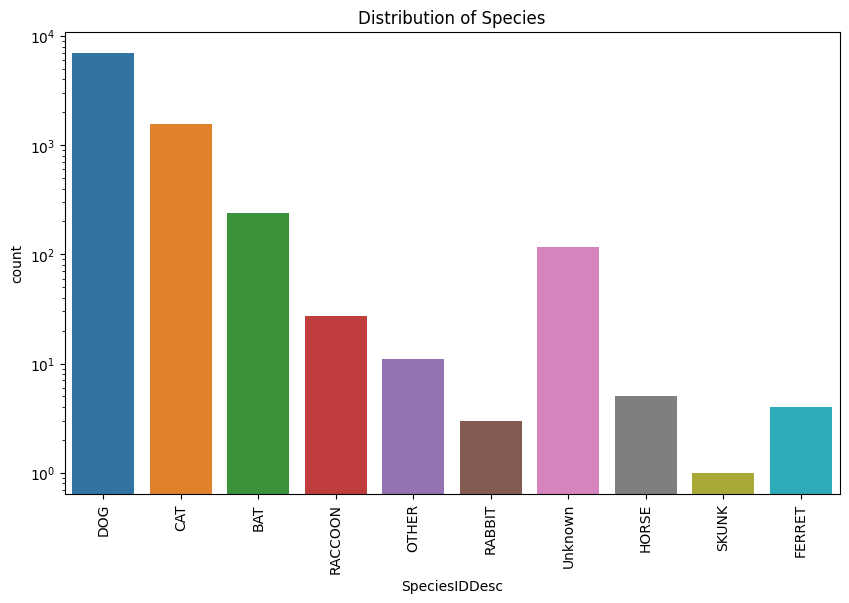

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SpeciesIDDesc')
plt.yscale('log') # Used to make the smaller data more readable
plt.xticks(rotation=90)
plt.title('Distribution of Species')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


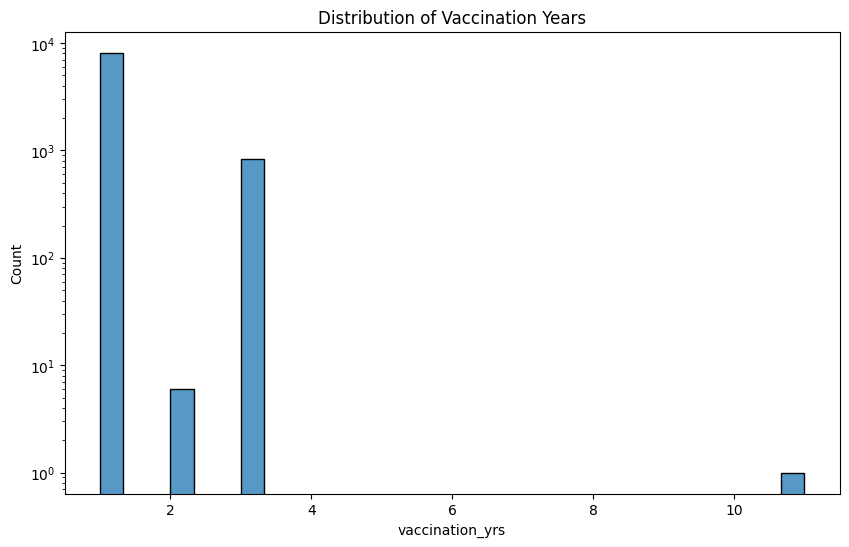

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['vaccination_yrs'], bins=30)
plt.title('Distribution of Vaccination Years')
plt.yscale('log')
plt.show()

/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_11368/776524923.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x='SpeciesIDDesc', y='vaccination_yrs', estimator=sum, ci=None)


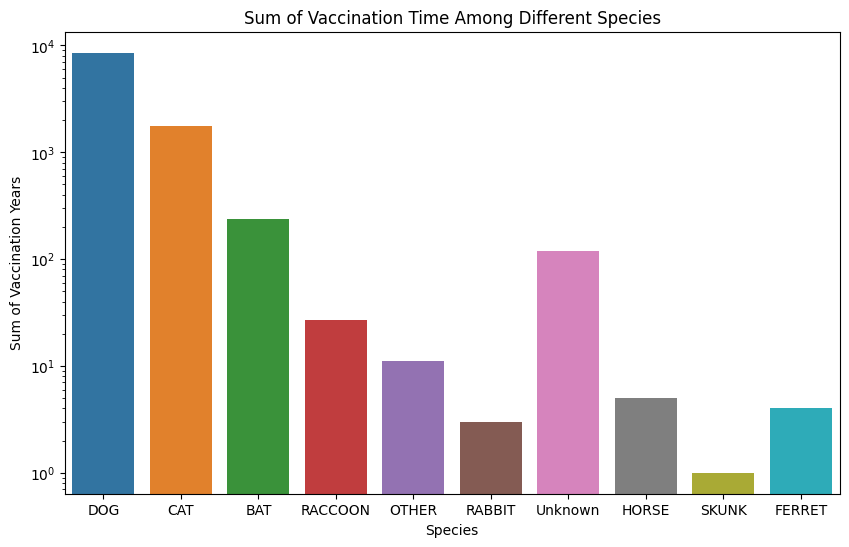

In [18]:
df_plot = df.dropna(subset=['vaccination_yrs'])
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='SpeciesIDDesc', y='vaccination_yrs', estimator=sum, ci=None)
plt.title('Sum of Vaccination Time Among Different Species')
plt.xlabel('Species')
plt.ylabel('Sum of Vaccination Years')
plt.yscale('log')
plt.show()


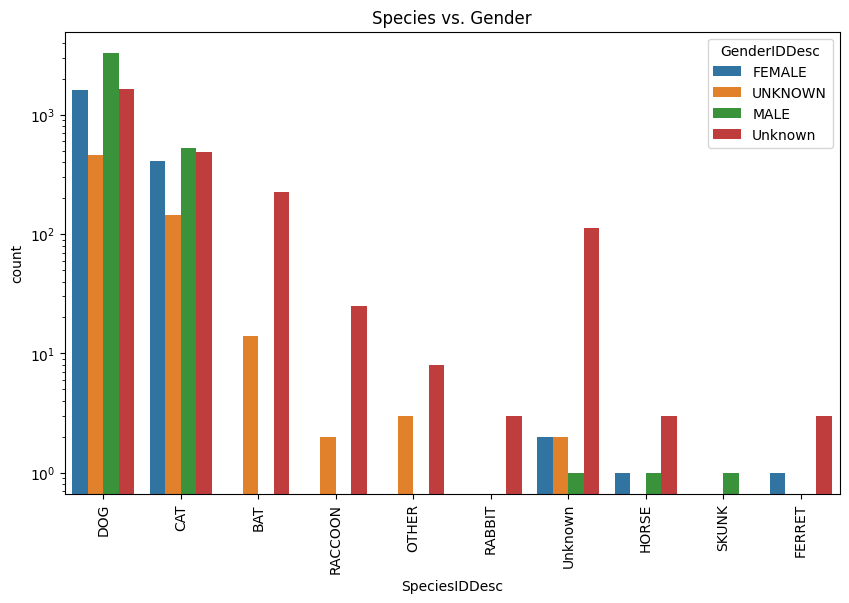

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SpeciesIDDesc',hue=df['GenderIDDesc'])
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Species vs. Gender')
plt.show()


In [20]:

# Subset data by species (e.g., comparing two species)
species_a = df[df['SpeciesIDDesc'] == 'DOG']['vaccination_yrs'].dropna()
species_b = df[df['SpeciesIDDesc'] == 'CAT']['vaccination_yrs'].dropna()

# Perform t-test
t_stat, p_val = ttest_ind(species_a, species_b)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Significant difference in vaccination years between DOG and CAT.")
else:
    print("No significant difference in vaccination years between DOG and CAT.")


T-statistic: 6.048318696703794, P-value: 1.5247794449981966e-09
Significant difference in vaccination years between DOG and CAT.


In [22]:

model = ols('vaccination_yrs ~ C(SpeciesIDDesc)', data=df).fit()
anova_result = anova_lm(model)
print(anova_result)

f_statistic = anova_result['F'][0]
p_value = anova_result['PR(>F)'][0]

if p_value < 0.05:
    print(f"Reject null hypothesis: There is a significant difference in vaccination years among different species (F-statistic = {f_statistic}, p-value = {p_value})")
else:
    print(f"Fail to reject null hypothesis: There is no significant difference in vaccination years among different species (F-statistic = {f_statistic}, p-value = {p_value})")

                      df       sum_sq   mean_sq         F        PR(>F)
C(SpeciesIDDesc)     9.0    28.212493  3.134721  9.068717  8.987912e-14
Residual          8993.0  3108.548809  0.345663       NaN           NaN
Reject null hypothesis: There is a significant difference in vaccination years among different species (F-statistic = 9.06871707071174, p-value = 8.987912257878949e-14)


/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_11368/3353328142.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_statistic = anova_result['F'][0]
/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_11368/3353328142.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_result['PR(>F)'][0]
